In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#      Reading Data

In [2]:
train0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
subm=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
test0["SalePrice"]=subm["SalePrice"]
df_train = pd.concat([train0, test0], axis=0).reset_index(drop=True)

In [3]:
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [4]:
df_train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2909,2910,180,RM,21.0,1470,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,137402.569856
2910,2911,160,RM,21.0,1484,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,165086.775062
2911,2912,20,RL,80.0,13384,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,188506.431412
2912,2913,160,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Abnorml,172917.456816
2913,2914,160,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,166274.325226
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,184924.279659
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,187741.866657


In [5]:
df_train=pd.DataFrame(df_train)

In [6]:
df_train.shape

(2919, 81)

In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180052.854647
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,57381.565721
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,154795.084126
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,176734.841494
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,191895.744157
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Correlation between features and output

<AxesSubplot:>

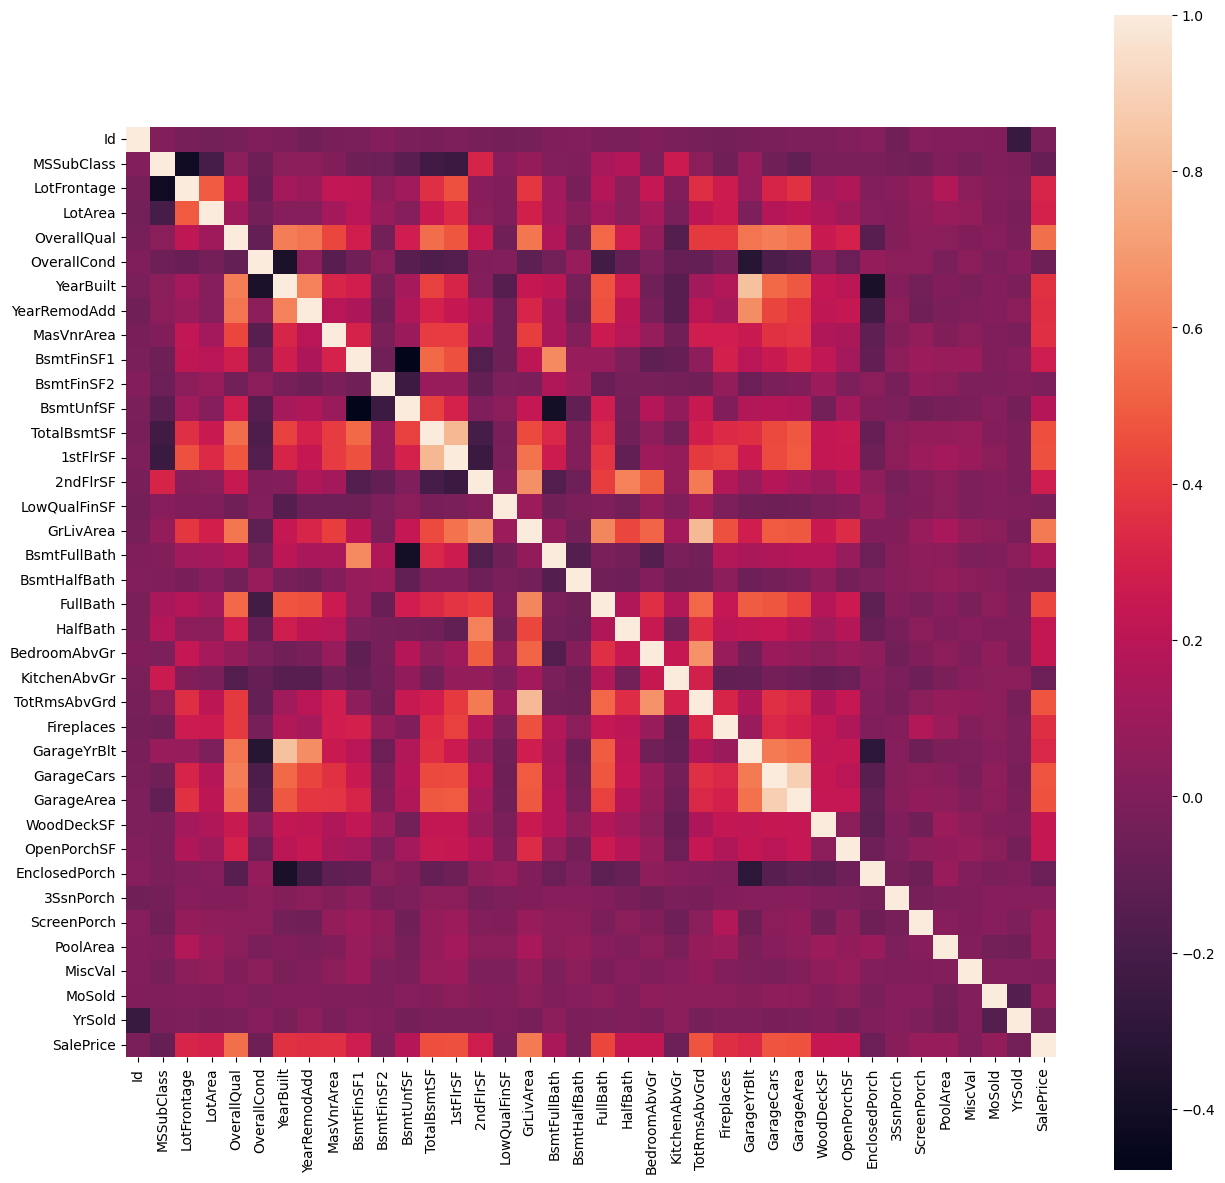

In [10]:
#  we want to get the correlation between features and output(SalePrice)
Correlation=df_train.corr()
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(Correlation,square=True)

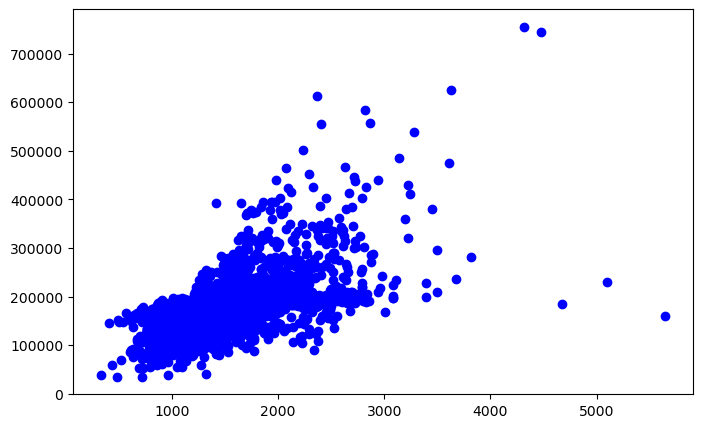

In [11]:
# from the graph we see that there is a positive correlation between GrLivArea and SalePrice
fig,ax=plt.subplots(figsize=(8,5))
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'],c='b')
plt.show()

In [12]:
X=df_train.iloc[:,0:-1]

# A dummy variable is a numeric variable that encodes categorical information.

In [13]:
X=pd.get_dummies(X)

In [14]:
X.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732.0,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369.0,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859.0,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851.0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
y=df_train.iloc[:,-1]

In [16]:
y.head(10)

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
5    143000.0
6    307000.0
7    200000.0
8    129900.0
9    118000.0
Name: SalePrice, dtype: float64

In [17]:
y.shape

(2919,)

In [18]:
X.isnull().sum()

Id                         0
MSSubClass                 0
LotFrontage              486
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 289, dtype: int64

In [19]:
Features=X.columns

In [20]:
Features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

# Handle Missing Data with Simple Imputer

In [21]:
ImputedModule = SimpleImputer(missing_values =np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)

In [22]:
X=pd.DataFrame(X,columns=Features)

In [23]:
X.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.000000,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.000000,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.000000,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.000000,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.000000,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,6.0,50.0,85.000000,14115.0,5.0,5.0,1993.0,1995.0,0.0,732.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7.0,20.0,75.000000,10084.0,8.0,5.0,2004.0,2005.0,186.0,1369.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,8.0,60.0,69.305795,10382.0,7.0,6.0,1973.0,1973.0,240.0,859.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9.0,50.0,51.000000,6120.0,7.0,5.0,1931.0,1950.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10.0,190.0,50.000000,7420.0,5.0,6.0,1939.0,1950.0,0.0,851.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Feature Selection

Choose best features which have high correlation with SalesPrice

In [24]:
sel = SelectFromModel(DecisionTreeRegressor(max_depth=15,random_state=33)) 
sel.fit(X,y)
X_new= sel.transform(X)
feature_idx =sel.get_support(indices=True)
feature_name = X.columns[feature_idx]

In [25]:
feature_name.shape

(19,)

# Selected Features

In [26]:
feature_name 

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'MoSold', 'LotConfig_CulDSac'],
      dtype='object')

In [27]:
X=pd.DataFrame(X_new,columns=feature_name)

In [28]:
X=pd.DataFrame(X)

# Data Scaling (Normalization)

In [29]:
scaler = MinMaxScaler(feature_range = (0,1))
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=feature_name)

In [30]:
X.head(10)

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,MoSold,LotConfig_CulDSac
0,0.000000,0.150685,0.033420,0.666667,0.949275,0.883333,0.125089,0.064212,0.140098,0.109641,0.413559,0.259231,0.375,0.346154,0.4,0.368280,0.000000,0.090909,0.0
1,0.000343,0.202055,0.038795,0.555556,0.753623,0.433333,0.173281,0.121575,0.206547,0.194917,0.000000,0.174830,0.375,0.259615,0.4,0.309140,0.209270,0.363636,0.0
2,0.000685,0.160959,0.046507,0.666667,0.934783,0.866667,0.086109,0.185788,0.150573,0.123083,0.419370,0.273549,0.375,0.339744,0.4,0.408602,0.000000,0.727273,0.0
3,0.001028,0.133562,0.038561,0.666667,0.311594,0.333333,0.038271,0.231164,0.123732,0.131695,0.366102,0.260550,0.375,0.330128,0.6,0.431452,0.000000,0.090909,0.0
4,0.001371,0.215753,0.060576,0.777778,0.927536,0.833333,0.116052,0.209760,0.187398,0.170342,0.509927,0.351168,0.500,0.336538,0.6,0.561828,0.134831,1.000000,0.0
5,0.001714,0.219178,0.059899,0.444444,0.876812,0.750000,0.129695,0.027397,0.130278,0.097038,0.274092,0.193670,0.125,0.314103,0.4,0.322581,0.028090,0.818182,0.0
6,0.002056,0.184932,0.041057,0.777778,0.956522,0.916667,0.242558,0.135702,0.275941,0.285654,0.000000,0.256217,0.375,0.349359,0.4,0.427419,0.179073,0.636364,0.0
7,0.002399,0.165431,0.042450,0.666667,0.731884,0.383333,0.152197,0.092466,0.181178,0.162361,0.476029,0.330821,0.375,0.250000,0.4,0.325269,0.165028,0.909091,0.0
8,0.002742,0.102740,0.022529,0.666667,0.427536,0.000000,0.000000,0.407534,0.155810,0.144507,0.364165,0.271289,0.250,0.115385,0.4,0.314516,0.063202,0.272727,0.0
9,0.003084,0.099315,0.028605,0.444444,0.485507,0.000000,0.150780,0.059932,0.162193,0.156060,0.000000,0.139977,0.250,0.141026,0.2,0.137769,0.000000,0.000000,0.0


In [31]:
y.shape

(2919,)

In [32]:
y = scaler.fit_transform(pd.DataFrame(y)) 

# Split Data into Train and Test

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  shuffle=True, random_state=42)

In [34]:
name=[]
Test_score=[]

# Choose Best Model

In [35]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=30,max_depth=30, random_state=33)
RandomForestRegressorModel.fit(X, y)
name.append("RandomForestRegressorModel")
print('Linear Regression Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))
Test_score.append(RandomForestRegressorModel.score(X_test, y_test))

Linear Regression Train Score is :  0.9792772472364666
Linear Regression Test Score is :  0.9795647216816855


In [36]:
LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X, y)
name.append("LinearRegressionModel")
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
Test_score.append(LinearRegressionModel.score(X_test, y_test))

Linear Regression Train Score is :  0.46268452852764397
Linear Regression Test Score is :  0.46413823982493363


In [37]:
DecisionTreeRegressorModel = DecisionTreeRegressor(max_depth=15,random_state=33)
DecisionTreeRegressorModel.fit(X, y)
name.append("DecisionTreeRegressorModel")
print('DecisionTreeRegressor Train Score is : ' , DecisionTreeRegressorModel.score(X_train, y_train))
print('DecisionTreeRegressor Test Score is : ' , DecisionTreeRegressorModel.score(X_test, y_test))
Test_score.append(DecisionTreeRegressorModel.score(X_test, y_test))

DecisionTreeRegressor Train Score is :  0.9971970308348228
DecisionTreeRegressor Test Score is :  0.9983104590891628


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=15,learning_rate = 0.8 ,random_state=33)
GBRModel.fit(X, y)
 

#Calculating Details
print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test)) 

GBRModel Train Score is :  0.9999999999999671
GBRModel Test Score is :  0.9999999999999764


In [39]:
from sklearn.neural_network import MLPRegressor

MLPRegressorModel = MLPRegressor(activation='relu', # can be also identity , logistic , relu
                                 solver='lbfgs',  # can be also sgd , adam
                                 learning_rate='adaptive', # can be also invscaling , adaptive
                                 early_stopping= False,
                                 alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPRegressorModel.fit(X, y)
name.append("MLPRegressor")

#Calculating Details
print('MLPRegressorModel Train Score is : ' , MLPRegressorModel.score(X_train, y_train))
print('MLPRegressorModel Test Score is : ' , MLPRegressorModel.score(X_test, y_test))
Test_score.append(MLPRegressorModel.score(X_test, y_test))

MLPRegressorModel Train Score is :  0.8744052494413044
MLPRegressorModel Test Score is :  0.893379116490456


In [40]:
Model=pd.DataFrame (name,columns = ['Model'])   
Test_Accuracy=pd.DataFrame (Test_score,columns = ['Test_Accuracy'])   

In [41]:
pd.concat([Model,Test_Accuracy],axis=1)

,Model,Test_Accuracy
0,RandomForestRegressorModel,0.979565
1,LinearRegressionModel,0.464138
2,DecisionTreeRegressorModel,0.998310
3,MLPRegressor,0.893379


# We will use DecisionTreeRegressor Model

In [42]:
y_pred = DecisionTreeRegressorModel.predict(X_test)
data=pd.DataFrame(y_pred,columns=["predicted_salePrice"])
data['Actual_SalesPrice']=y_test

In [43]:
data.head(10) 

,predicted_salePrice,Actual_SalesPrice
0,0.201634,0.201634
1,0.219118,0.219118
2,0.171160,0.171160
3,0.211915,0.211915
4,0.190423,0.190423
5,0.384630,0.384630
6,0.165506,0.165442
7,0.312595,0.312595
8,0.210231,0.209830
9,0.203969,0.203740


<AxesSubplot:ylabel='Density'>

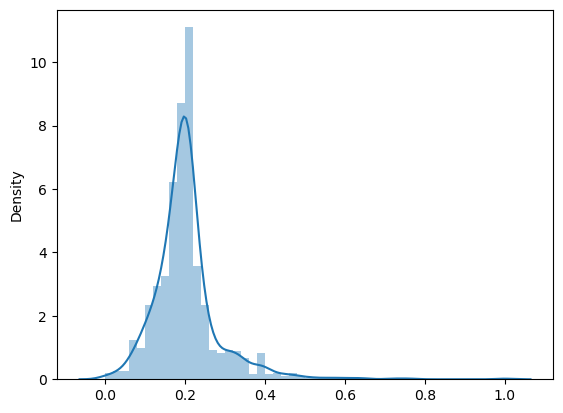

In [44]:
sns.distplot(y_pred)

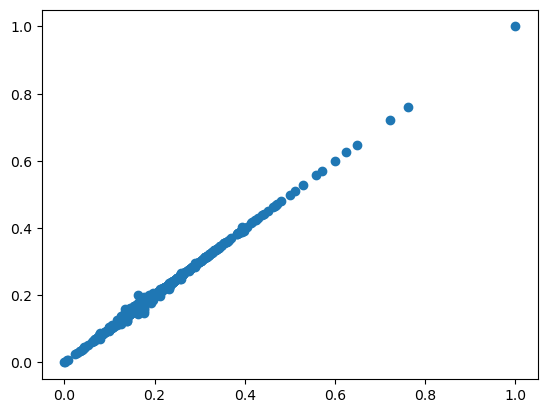

In [45]:
plt.scatter(y_pred,y_test)